 # Notes and exercises from [Nielsen2015](http://neuralnetworksanddeeplearning.com/)
 ---

 ## Ch. 3 Improvements

 ## Sec. 3.1 The Cross-Entropy Cost Function

 Learning slows down since $\frac{\partial C}{\partial w}$
 and $\frac{\partial C}{\partial b}$ scale linearly with $\sigma^\prime(z)$,
 which is nearly flat $\forall z > 0$.

 Solution: Use the *cross-entropy* cost/loss function

 $C = \frac{1}{n} \sum\limits_x C_x$

 $C_x = -[y \ln a + (1 - y) \ln(1 - a)]$

In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt

A, Y = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
C1 = (Y - A)**2
C2 = -(Y*np.log(A + 0.001) + (1 - Y)*np.log(1 - A + 0.001))


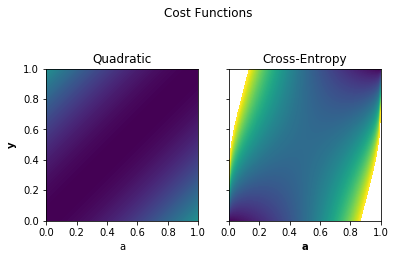

In [2]:
fig = plt.figure(1)
fig.suptitle('Cost Functions')
ax = fig.add_subplot(1, 2, 1)
cp = ax.contourf(A, Y, C1, np.arange(0, 2, 0.01))
ax.set_title('Quadratic')
ax.set_xlabel('a')
ax.set_xlim(0, 1)
ax.set_ylabel(r'$\mathbf{y}$')
ax.set_ylim(0, 1)
ax.set_aspect('equal')

ax = fig.add_subplot(1, 2, 2)
cp = ax.contourf(A, Y, C2, np.arange(0, 2, 0.01))
ax.set_title('Cross-Entropy')
ax.set_xlabel(r'$\mathbf{a}$')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal')
ax.tick_params(axis = 'y', labelleft = False)

plt.show()


 Taking the derivatives (assuming a 3-input, 1-layer, 1-neuron network):

 $\frac{\partial C_x}{\partial w_j} = \ldots = x_j (\sigma(z) - y) = x_j (a - y)$

 $\frac{\partial C_x}{\partial b} = \ldots = (a - y)$

 This means that, given such $C$, the learning rates are proportional
 to the output error, better than just on $\sigma^\prime(z)$.

 Generalizing to a many-neuron, $N$-layer network:

 $C_x = - \sum\limits_i [ y_i \ln(a_i^N) + (1 - y_i) \ln(1 - a_i^N)] $

 ## Sec. 3.2 Softmax

 Instead of applying the sigmoid activation function to get the output,
 use the *softmax* function instead:

 $a_i^N = \sigma(z_i^N, \mathbf{z}^N) = \frac{\mathrm{e}^{z_i^N}}{\sum\limits_j \mathrm{e}^{z_j^N}}$

 This is handy way to get an output vector $\mathbf{a}_N$
 that can be interpretated as a normalized probability distribution.

 Softmax activation should be combined with the *log-likelihood* cost/loss function:

 $C = - \ln a_{(y)}^N$

 ## Sec. 3.3 Overfitting

 Consider training a network with 1 30-neuron hidden layer with just 1,000 MNIST images,
 i.e. a model with 23,860 parameters.

 Over many training epochs, the classification accuracy (using a test set)
 saturates at ca. 80% while the cost/loss on the training set continues to decrease.

 In addition, the cost on the test set reached a minimum at epoch 15 and starts to increases;
 the classification accuracy on the training set reached 100% by epoch 80,
 suggesting that the model is *overfitting* the small training set
 that it is given.

 Strategy to avoid overfitting:

 1. Start with three datasets: training, validation, testing.

 2. Monitor the classification accuracy on validation set
 as a function of training epoch number.

 3. Stop training when this accuracy saturates (aka *early stopping*).

 The use of a validation set (*cross validation*) is part of the *holdout* method,
 wherein data is held out from the larger set
 to find the optimal set of *hyper-parameters*
 (e.g. number of neurons, number of epochs, learning rate, batch size).
 Another cross-validation technique is the 'k-fold' method,
 where the overall dataset is divided in $k$ subsets and the holdout method is applied
 k times (each iteration uses a different subset of the data for cross validation).

 ## Sec. 3.4 Regularization

 *Regularization* involves adding an extra scaled term to the cost/loss function.

 In $L^2$ regularization,

 $C = C_0 + \frac{\lambda}{2 n} \sum\limits_w w^2$

 where $C_0$ is the unregularized function and
 $\lambda > 0$ is the regularization parameter.
 $L^2$ refers to the exponent 2 (as in $L^2$ norm).

 The result is a network that prefers to learn smaller weights $w$.

 In gradient descent:

 $\frac{\partial C}{\partial w} \rightarrow \frac{\partial C_0}{\partial w} + \frac{\lambda}{n} w$

 $w \rightarrow w - \eta \frac{\partial C_0}{\partial w} - \eta \frac{\lambda}{n} w = \left( 1 - \frac{\eta \lambda}{n} \right) w - \eta \frac{\partial C_0}{\partial w}$

 while

 $\frac{\partial C}{\partial b} \rightarrow \frac{\partial C_0}{\partial b}$

 $b \rightarrow b - \eta \frac{\partial C_0}{\partial b}$

 The weights $w$ are rescaled and driven to be smaller (*weight decay*).

 In stochastic gradient descent:

 $w \rightarrow \left( 1 - \frac{\eta \lambda}{n} \right) w - \frac{\eta}{m} \sum\limits_x \frac{\partial C_{0,x}}{\partial w}$

 $b \rightarrow b - \frac{\eta}{m} \sum\limits_x \frac{\partial C_{0,x}}{\partial b}$

 where $m$ is the batch size and $C_{0, x}$ is the unregularized cost function for each training example.

 Taking $\lambda = 0.1$ into the same case in the previous section supresses
 overfitting, i.e. the classification accuracy of the validation data does not saturate
 even by epoch 400 while the cost function decreases monotonically.
 The accuracy of the training data is also more consistent with that of the validation data
 as a function of epoch number.

 Heuristically, unregularized cost functions causes the weight vector $\mathbf{w}$
 to become longer and longer ($|\mathbf{w}|$ large) and thus stuck pointing in the same direction,
 i.e. the network becomes stuck in local minima and stops learning.